In [277]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import scipy.stats as stats
import seaborn as sns
import ast

sns.set(style='ticks', color_codes = True)

# Input 

In [2]:
df = pd.read_csv('seatgeek_ticket_info.csv')
df.head()

/Users/linhchau/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,access_method,announce_date,announcements,conditional,created_at,date_tbd,datetime_local,datetime_tbd,datetime_utc,...,venue_name_v2,venue_num_upcoming_events,venue_popularity,venue_postal_code,venue_score,venue_slug,venue_state,venue_timezone,venue_url,visible_until_utc
0,0,NaN,2019-01-23T00:00:00,{'checkout_disclosures': {'messages': [{'text'...,False,2019-01-23T16:10:16,False,2019-10-08T03:30:00,False,2019-10-08T10:30:00,...,Le Theatre Des Arts at Paris Las Vegas,161,0,89109,0.453888,le-theatre-des-arts-at-paris-las-vegas,NV,America/Los_Angeles,https://seatgeek.com/venues/le-theatre-des-art...,2019-10-09T07:00:00
1,1,NaN,2018-12-20T00:00:00,{'checkout_disclosures': {'messages': [{'text'...,False,2018-12-20T16:11:07,False,2019-10-08T03:30:00,False,2019-10-08T10:30:00,...,High Roller Wheel At the LINQ,158,0,89109,0.000000,high-roller-wheel-at-the-linq,NV,America/Los_Angeles,https://seatgeek.com/venues/high-roller-wheel-...,2019-10-09T07:00:00
2,2,NaN,2019-05-02T00:00:00,{},False,2019-05-02T16:16:35,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,...,Colonial Theater,1,0,83402,0.394669,colonial-theater-2,ID,America/Boise,https://seatgeek.com/venues/colonial-theater-2...,2019-10-09T05:30:00
3,3,NaN,2019-05-14T00:00:00,{},False,2019-05-14T02:59:07,False,2019-10-08T18:30:00,False,2019-10-09T01:30:00,...,House of Blues - Anaheim,52,0,92802,0.544078,house-of-blues-anaheim,CA,America/Los_Angeles,https://seatgeek.com/venues/house-of-blues-ana...,2019-10-09T05:30:00
4,4,NaN,2019-08-24T00:00:00,{},False,2019-08-24T16:02:30,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,...,Gasa Gasa,30,0,70115,0.354410,gasa-gasa,LA,America/Chicago,https://seatgeek.com/venues/gasa-gasa/tickets,2019-10-09T05:30:00


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114368 entries, 0 to 114367
Data columns (total 89 columns):
access_method                            14441 non-null object
announce_date                            114368 non-null object
announcements                            114368 non-null object
conditional                              114368 non-null bool
created_at                               114368 non-null object
date_tbd                                 114368 non-null bool
datetime_local                           114368 non-null object
datetime_tbd                             114368 non-null bool
datetime_utc                             114368 non-null object
description                              18 non-null object
enddatetime_utc                          0 non-null float64
event_promotion                          0 non-null float64
general_admission                        14624 non-null object
id                                       114368 non-null int64
is_open       

In [55]:
df.columns

Index(['access_method', 'announce_date', 'announcements', 'conditional',
       'created_at', 'date_tbd', 'datetime_local', 'datetime_tbd',
       'datetime_utc', 'description', 'enddatetime_utc', 'event_promotion',
       'general_admission', 'id', 'is_open', 'links', 'performers',
       'performers_away_team', 'performers_colors', 'performers_divisions',
       'performers_genres', 'performers_has_upcoming_events',
       'performers_home_team', 'performers_home_venue_id', 'performers_id',
       'performers_image', 'performers_image_attribution',
       'performers_image_license', 'performers_images', 'performers_location',
       'performers_name', 'performers_num_upcoming_events',
       'performers_popularity', 'performers_primary', 'performers_score',
       'performers_short_name', 'performers_slug', 'performers_stats',
       'performers_taxonomies', 'performers_type', 'performers_url',
       'popularity', 'score', 'short_title', 'stats', 'stats_average_price',
       'stats

In [150]:
# df['performers_genres']
for i in range(len(df)):
    if i % 100 == 0:
        print(i)
    if type(df['performers_genres'][i]) is str:
        try:
            df['performers_genres'][i] = ast.literal_eval(df['performers_genres'][i])[0]['name']
        except Exception:
            pass
#     df['performers_main_genres'][i] = ast.literal_eval(df['performers_genres'][i])[0]['name']
# df['performers_genres'] = ast.literal_eval(df['performers_genres'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


/Users/linhchau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
21000
21100
21200
21300
21400
21500
21600
21700
21800
21900
22000
22100
22200
22300
22400
22500

In [151]:
df['performers_genres']

0          NaN
1          NaN
2          NaN
3          Pop
4          NaN
5          Pop
6          Pop
7          Pop
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18        Soul
19         NaN
20         Pop
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         Pop
28         NaN
29         NaN
          ... 
114338     NaN
114339     NaN
114340     NaN
114341     NaN
114342     NaN
114343     NaN
114344     NaN
114345     NaN
114346     NaN
114347     NaN
114348     NaN
114349     NaN
114350     NaN
114351     NaN
114352     NaN
114353     Pop
114354     NaN
114355     Pop
114356     Pop
114357     Pop
114358     Pop
114359     Pop
114360     Pop
114361     Pop
114362     Pop
114363     Pop
114364     Pop
114365     Pop
114366     NaN
114367     NaN
Name: performers_genres, Length: 114368, dtype: object

In [152]:
df = df.assign(**pd.DataFrame(df.performers_genres.values.tolist()).add_prefix('genre_'))

In [195]:
df.to_csv('seatgeek_ticket_info_2.csv')

In [196]:
df.performers_genres.values

array([nan, nan, nan, ..., 'Pop', nan, nan], dtype=object)

In [197]:
df

,access_method,announce_date,announcements,conditional,created_at,date_tbd,datetime_local,datetime_tbd,datetime_utc,description,...,venue_num_upcoming_events,venue_popularity,venue_postal_code,venue_score,venue_slug,venue_state,venue_timezone,venue_url,visible_until_utc,genre_0
0,NaN,2019-01-23T00:00:00,{'checkout_disclosures': {'messages': [{'text'...,False,2019-01-23T16:10:16,False,2019-10-08T03:30:00,False,2019-10-08T10:30:00,NaN,...,161,0,89109,0.453888,le-theatre-des-arts-at-paris-las-vegas,NV,America/Los_Angeles,https://seatgeek.com/venues/le-theatre-des-art...,2019-10-09T07:00:00,NaN
1,NaN,2018-12-20T00:00:00,{'checkout_disclosures': {'messages': [{'text'...,False,2018-12-20T16:11:07,False,2019-10-08T03:30:00,False,2019-10-08T10:30:00,NaN,...,158,0,89109,0.000000,high-roller-wheel-at-the-linq,NV,America/Los_Angeles,https://seatgeek.com/venues/high-roller-wheel-...,2019-10-09T07:00:00,NaN
2,NaN,2019-05-02T00:00:00,{},False,2019-05-02T16:16:35,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,1,0,83402,0.394669,colonial-theater-2,ID,America/Boise,https://seatgeek.com/venues/colonial-theater-2...,2019-10-09T05:30:00,NaN
3,NaN,2019-05-14T00:00:00,{},False,2019-05-14T02:59:07,False,2019-10-08T18:30:00,False,2019-10-09T01:30:00,NaN,...,52,0,92802,0.544078,house-of-blues-anaheim,CA,America/Los_Angeles,https://seatgeek.com/venues/house-of-blues-ana...,2019-10-09T05:30:00,Pop
4,NaN,2019-08-24T00:00:00,{},False,2019-08-24T16:02:30,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,30,0,70115,0.354410,gasa-gasa,LA,America/Chicago,https://seatgeek.com/venues/gasa-gasa/tickets,2019-10-09T05:30:00,NaN
5,NaN,2019-07-13T00:00:00,{},False,2019-07-13T16:04:06,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,19,0,80212,0.322193,the-oriental-theater,CO,America/Denver,https://seatgeek.com/venues/the-oriental-theat...,2019-10-09T05:30:00,Pop
6,NaN,2019-09-09T00:00:00,{},False,2019-09-09T16:04:28,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,18,0,60618,0.000000,constellation,IL,America/Chicago,https://seatgeek.com/venues/constellation/tickets,2019-10-09T05:30:00,Pop
7,"{'employee_only': False, 'created_at': '2015-1...",2019-01-31T00:00:00,{},False,2019-01-31T16:17:36,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,25,0,80465,0.745735,red-rocks-amphitheatre,CO,America/Denver,https://seatgeek.com/venues/red-rocks-amphithe...,2019-10-09T05:30:00,Pop
8,NaN,2019-04-26T00:00:00,{},False,2019-04-26T16:21:18,False,2019-10-08T21:30:00,False,2019-10-09T01:30:00,NaN,...,35,0,H2R 2X2,0.392210,bar-le-ritz-pdb-1,QC,America/Toronto,https://seatgeek.com/venues/bar-le-ritz-pdb-1/...,2019-10-09T05:30:00,NaN
9,NaN,2019-09-13T00:00:00,{},False,2019-09-13T16:08:37,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,11,0,78751,0.000000,coldtowne-theater,TX,America/Chicago,https://seatgeek.com/venues/coldtowne-theater/...,2019-10-09T05:30:00,NaN


In [198]:
useful_col = [ 'datetime_local','description', 'enddatetime_utc',
       'general_admission', 'id','performers_genres','performers_id',
       'performers_name', 'performers_num_upcoming_events',
       'performers_popularity', 'performers_primary', 'performers_score',
       'performers_short_name', 'performers_slug', 'performers_stats',
       'performers_taxonomies', 'performers_type', 'performers_url',
       'popularity', 'score', 'short_title', 'stats_average_price',
       'stats_dq_bucket_counts', 'stats_highest_price', 'stats_listing_count',
       'stats_lowest_price', 'stats_lowest_price_good_deals',
       'stats_lowest_sg_base_price', 'stats_lowest_sg_base_price_good_deals',
       'stats_median_price', 'stats_variants', 'stats_visible_listing_count',
       'status', 'taxonomies_id', 'taxonomies_name',
       'taxonomies_parent_id', 'time_tbd', 'title', 'type', 'url', 'venue', 'venue_capacity', 'venue_city',
       'venue_country', 'venue_id', 
       'venue_location', 'venue_metro_code', 'venue_name', 
       'venue_num_upcoming_events', 'venue_popularity', 'venue_postal_code',
       'venue_score', 'venue_slug', 'venue_state']

In [199]:
df.index.nbytes + df.columns.nbytes + df.values.nbytes

82345760

In [200]:
df[df['performers_name'] == 'Steely Dan'].loc[:,'stats':'stats_median_price']

,stats,stats_average_price,stats_dq_bucket_counts,stats_highest_price,stats_listing_count,stats_lowest_price,stats_lowest_price_good_deals,stats_lowest_sg_base_price,stats_lowest_sg_base_price_good_deals,stats_median_price
2704,"{'visible_listing_count': 58, 'dq_bucket_count...",163.0,"[10, 25, 18, 13, 18, 23, 11, 0]",254.0,118.0,100.0,100.0,75.0,75.0,169.0
4428,"{'visible_listing_count': 39, 'dq_bucket_count...",214749.0,"[0, 11, 26, 1, 0, 10, 6, 0]",214749.0,59.0,95.0,135.0,71.0,103.0,173.0
7092,"{'visible_listing_count': 68, 'dq_bucket_count...",433.0,"[13, 26, 26, 11, 11, 13, 17, 0]",1906.0,139.0,199.0,199.0,155.0,155.0,395.0
7874,"{'visible_listing_count': 121, 'dq_bucket_coun...",346.0,"[24, 41, 55, 24, 19, 18, 30, 0]",1223.0,252.0,88.0,96.0,66.0,73.0,311.0
9519,"{'visible_listing_count': 66, 'dq_bucket_count...",525.0,"[13, 24, 29, 14, 10, 12, 15, 0]",1223.0,136.0,248.0,248.0,189.0,189.0,425.0
9521,"{'visible_listing_count': 66, 'dq_bucket_count...",525.0,"[13, 24, 29, 14, 10, 12, 15, 0]",1223.0,136.0,248.0,248.0,189.0,189.0,425.0
11641,"{'visible_listing_count': 109, 'dq_bucket_coun...",400.0,"[17, 48, 41, 10, 17, 23, 23, 0]",1482.0,221.0,98.0,98.0,73.0,73.0,326.0
13642,"{'visible_listing_count': 16, 'dq_bucket_count...",288.0,"[3, 1, 1, 4, 1, 3, 1, 0]",617.0,16.0,132.0,132.0,100.0,100.0,234.0
14085,"{'visible_listing_count': 64, 'dq_bucket_count...",531.0,"[17, 25, 21, 6, 5, 22, 17, 0]",1223.0,127.0,211.0,235.0,164.0,179.0,410.0
16343,"{'visible_listing_count': 49, 'dq_bucket_count...",260.0,"[1, 1, 2, 0, 2, 1, 2, 0]",700.0,69.0,105.0,176.0,78.0,132.0,194.0


# Grabbing Concerts

In [238]:
concerts = df[df['taxonomies_name'] == 'concert']
len(concerts)

30634

In [239]:
concerts['datetime_local'].min()

'2019-10-08T18:30:00'

In [240]:
concerts['datetime_local'].max()

'2029-12-31T18:00:00'

In [241]:
concerts

,access_method,announce_date,announcements,conditional,created_at,date_tbd,datetime_local,datetime_tbd,datetime_utc,description,...,venue_num_upcoming_events,venue_popularity,venue_postal_code,venue_score,venue_slug,venue_state,venue_timezone,venue_url,visible_until_utc,genre_0
3,NaN,2019-05-14T00:00:00,{},False,2019-05-14T02:59:07,False,2019-10-08T18:30:00,False,2019-10-09T01:30:00,NaN,...,52,0,92802,0.544078,house-of-blues-anaheim,CA,America/Los_Angeles,https://seatgeek.com/venues/house-of-blues-ana...,2019-10-09T05:30:00,Pop
4,NaN,2019-08-24T00:00:00,{},False,2019-08-24T16:02:30,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,30,0,70115,0.354410,gasa-gasa,LA,America/Chicago,https://seatgeek.com/venues/gasa-gasa/tickets,2019-10-09T05:30:00,NaN
5,NaN,2019-07-13T00:00:00,{},False,2019-07-13T16:04:06,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,19,0,80212,0.322193,the-oriental-theater,CO,America/Denver,https://seatgeek.com/venues/the-oriental-theat...,2019-10-09T05:30:00,Pop
6,NaN,2019-09-09T00:00:00,{},False,2019-09-09T16:04:28,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,18,0,60618,0.000000,constellation,IL,America/Chicago,https://seatgeek.com/venues/constellation/tickets,2019-10-09T05:30:00,Pop
7,"{'employee_only': False, 'created_at': '2015-1...",2019-01-31T00:00:00,{},False,2019-01-31T16:17:36,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,25,0,80465,0.745735,red-rocks-amphitheatre,CO,America/Denver,https://seatgeek.com/venues/red-rocks-amphithe...,2019-10-09T05:30:00,Pop
11,NaN,2019-07-03T00:00:00,{},False,2019-07-03T16:18:39,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,30,0,53703,0.469178,majestic-theatre-1,WI,America/Chicago,https://seatgeek.com/venues/majestic-theatre-1...,2019-10-09T05:30:00,NaN
12,NaN,2019-08-06T00:00:00,{},False,2019-08-06T16:02:50,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,27,0,T8N 3Z9,0.368129,arden-theatre,AB,America/Edmonton,https://seatgeek.com/venues/arden-theatre/tickets,2019-10-09T05:30:00,NaN
18,NaN,2019-08-06T00:00:00,{},False,2019-08-06T16:02:52,False,2019-10-08T20:00:00,False,2019-10-09T02:00:00,NaN,...,40,0,83702,0.424066,knitting-factory-boise,ID,America/Boise,https://seatgeek.com/venues/knitting-factory-b...,2019-10-09T06:00:00,Soul
20,NaN,2019-06-23T00:00:00,{},False,2019-06-23T16:08:33,False,2019-10-08T19:00:00,False,2019-10-09T02:00:00,NaN,...,18,0,V5T 0B5,0.401773,biltmore-cabaret,BC,America/Vancouver,https://seatgeek.com/venues/biltmore-cabaret/t...,2019-10-09T06:00:00,Pop
27,NaN,2019-06-06T00:00:00,{},False,2019-06-06T16:02:29,False,2019-10-08T20:00:00,False,2019-10-09T02:00:00,NaN,...,18,0,84111,0.000000,the-state-room-5,UT,America/Denver,https://seatgeek.com/venues/the-state-room-5/t...,2019-10-09T06:00:00,Pop


In [242]:
len(concerts['performers_name'].unique())

7609

# Filtering

In [243]:
# Number of null values per column
for i in concerts.columns:
    print(str(i) + " " + str((concerts[i].isnull().sum()/len(concerts))*100))

access_method 88.83593392962068
announce_date 0.0
announcements 0.0
conditional 0.0
created_at 0.0
date_tbd 0.0
datetime_local 0.0
datetime_tbd 0.0
datetime_utc 0.0
description 99.9902069595874
enddatetime_utc 100.0
event_promotion 100.0
general_admission 65.93001240451785
id 0.0
is_open 0.0
links 0.0
performers 0.0
performers_away_team 100.0
performers_colors 99.9281843703075
performers_divisions 100.0
performers_genres 25.58921459815891
performers_has_upcoming_events 0.0
performers_home_team 99.99347130639158
performers_home_venue_id 100.0
performers_id 0.0
performers_image 0.6071685055820331
performers_image_attribution 5.128288829405236
performers_image_license 9.087941502905268
performers_images 0.0
performers_location 100.0
performers_name 0.0
performers_num_upcoming_events 0.0
performers_popularity 0.0
performers_primary 7.338251615851668
performers_score 0.0
performers_short_name 0.0
performers_slug 0.0
performers_stats 0.0
performers_taxonomies 0.0
performers_type 0.0
performe

I'm particularly interested in the stats columns, given that they have the price information. Let's look at those speicific columns and their missing dara.

In [244]:
# Find rows that don't have average price and look at the other stat columns
concerts[concerts['stats_average_price'].isnull()].loc[:,'stats':'stats_median_price']

,stats,stats_average_price,stats_dq_bucket_counts,stats_highest_price,stats_listing_count,stats_lowest_price,stats_lowest_price_good_deals,stats_lowest_sg_base_price,stats_lowest_sg_base_price_good_deals,stats_median_price
6,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,"{'visible_listing_count': None, 'dq_bucket_cou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seems like those columns with a nan in one stat column has nan in the other stat columns.

In [245]:
concerts[concerts['stats_average_price'].isnull()].loc[:,['short_title', 'venue_city']]

,short_title,venue_city
6,William Tyler,Chicago
31,Frank Carter & The Rattlesnakes with Evan Konr...,Vancouver
38,The Songbooks of SADE & MAXWELL,Las Vegas
39,Coast 2 Coast LIVE Artist Showcase Memphis TN,Memphis
53,Dead End Kids,Denver
54,Deep Sea Diver,Denver
62,David Garfield & The Cats,Westlake Village
71,Nacho Picasso with The Dopplegangaz,Sacramento
79,Beyond Fest,Los Angeles
83,Joe Hertler & The Rainbow Seekers with Los Elk...,Seattle


In [246]:
# Number of unique event titles with missing stat info
len(concerts[concerts['stats_average_price'].isnull()].loc[:,['short_title']].short_title.unique())

5251

In [247]:
# concerts[concerts['stats_average_price'].isnull()].loc[:,['short_title']].short_title.unique()

In [248]:
len(concerts[~concerts['stats_average_price'].isnull()])

22881

Given that I want to model ticket prices and that the rows with missing stat features tend to have all of them missing, I'm gonna filter out those columns, though I'm dropping about 5000 rows, those rows are no longer informative and I probably can't impute them since there are differences between events. 

In [249]:
concerts_filtered = concerts[~concerts['stats_average_price'].isnull()]
concerts_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22881 entries, 3 to 114367
Data columns (total 90 columns):
access_method                            3237 non-null object
announce_date                            22881 non-null object
announcements                            22881 non-null object
conditional                              22881 non-null bool
created_at                               22881 non-null object
date_tbd                                 22881 non-null bool
datetime_local                           22881 non-null object
datetime_tbd                             22881 non-null bool
datetime_utc                             22881 non-null object
description                              3 non-null object
enddatetime_utc                          0 non-null float64
event_promotion                          0 non-null float64
general_admission                        6540 non-null object
id                                       22881 non-null int64
is_open                    

In [250]:
concerts_filtered.head()

,access_method,announce_date,announcements,conditional,created_at,date_tbd,datetime_local,datetime_tbd,datetime_utc,description,...,venue_num_upcoming_events,venue_popularity,venue_postal_code,venue_score,venue_slug,venue_state,venue_timezone,venue_url,visible_until_utc,genre_0
3,NaN,2019-05-14T00:00:00,{},False,2019-05-14T02:59:07,False,2019-10-08T18:30:00,False,2019-10-09T01:30:00,NaN,...,52,0,92802,0.544078,house-of-blues-anaheim,CA,America/Los_Angeles,https://seatgeek.com/venues/house-of-blues-ana...,2019-10-09T05:30:00,Pop
4,NaN,2019-08-24T00:00:00,{},False,2019-08-24T16:02:30,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,30,0,70115,0.354410,gasa-gasa,LA,America/Chicago,https://seatgeek.com/venues/gasa-gasa/tickets,2019-10-09T05:30:00,NaN
5,NaN,2019-07-13T00:00:00,{},False,2019-07-13T16:04:06,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,19,0,80212,0.322193,the-oriental-theater,CO,America/Denver,https://seatgeek.com/venues/the-oriental-theat...,2019-10-09T05:30:00,Pop
7,"{'employee_only': False, 'created_at': '2015-1...",2019-01-31T00:00:00,{},False,2019-01-31T16:17:36,False,2019-10-08T19:30:00,False,2019-10-09T01:30:00,NaN,...,25,0,80465,0.745735,red-rocks-amphitheatre,CO,America/Denver,https://seatgeek.com/venues/red-rocks-amphithe...,2019-10-09T05:30:00,Pop
11,NaN,2019-07-03T00:00:00,{},False,2019-07-03T16:18:39,False,2019-10-08T20:30:00,False,2019-10-09T01:30:00,NaN,...,30,0,53703,0.469178,majestic-theatre-1,WI,America/Chicago,https://seatgeek.com/venues/majestic-theatre-1...,2019-10-09T05:30:00,NaN


In [251]:
# Number of null values per column
for i in concerts_filtered.columns:
    print(str(i) + " " + str((concerts_filtered[i].isnull().sum()/len(concerts))*100))

access_method 64.12482862179279
announce_date 0.0
announcements 0.0
conditional 0.0
created_at 0.0
date_tbd 0.0
datetime_local 0.0
datetime_tbd 0.0
datetime_utc 0.0
description 74.68172618659005
enddatetime_utc 74.69151922700267
event_promotion 74.69151922700267
general_admission 53.34269112750538
id 0.0
is_open 0.0
links 0.0
performers 0.0
performers_away_team 74.69151922700267
performers_colors 74.62296794411438
performers_divisions 74.69151922700267
performers_genres 13.037801135992687
performers_has_upcoming_events 0.0
performers_home_team 74.68499053339427
performers_home_venue_id 74.69151922700267
performers_id 0.0
performers_image 0.36234249526669715
performers_image_attribution 3.851929228961285
performers_image_license 6.326304106548279
performers_images 0.0
performers_location 74.69151922700267
performers_name 0.0
performers_num_upcoming_events 0.0
performers_popularity 0.0
performers_primary 6.443820591499641
performers_score 0.0
performers_short_name 0.0
performers_slug 0.0

Though there are some stats columns with missing values, the avg, median, and lowest price are NAN free!

/Users/linhchau/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/linhchau/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


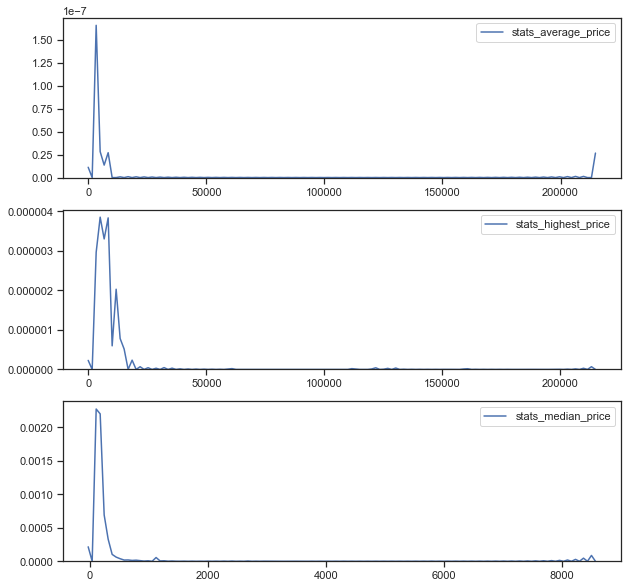

In [252]:
measures = ['stats_average_price', 'stats_highest_price', 'stats_median_price']

fig, axes = plt.subplots(3,1, figsize = (10,10))
for measure, ax in zip(measures, axes.flat):
    sns.kdeplot(concerts_filtered[measure], ax=ax);

In [253]:
# highest avaerage price, yo I think this is can error, how can highest and average price be the same. Let's toss this
concerts_filtered['stats_average_price'].max()
concerts_filtered.loc[concerts_filtered['stats_average_price'].idxmax()]

access_method                                                                   NaN
announce_date                                                   2019-04-16T00:00:00
announcements                     {'checkout_disclosures': {'messages': [{'text'...
conditional                                                                   False
created_at                                                      2019-04-16T16:07:05
date_tbd                                                                      False
datetime_local                                                  2019-10-12T20:00:00
datetime_tbd                                                                  False
datetime_utc                                                    2019-10-13T00:00:00
description                                                                     NaN
enddatetime_utc                                                                 NaN
event_promotion                                                             

214749.0????? WHO WOULD PAY THAT MUCH FOR A STEELY DAN CONCERT????? THAT MUST BE ERROR. LETS TOSS IT!

In [254]:
concerts_filtered['stats_highest_price'].sort_values(ascending=False)
# concerts_filtered.loc[concerts_filtered['stats_highest_price'].idxmax()]

4428      214749.0
21925     159896.0
35166     130528.0
34334     126273.0
31343     122003.0
52844     120783.0
102609    112244.0
79647      60298.0
9057       34507.0
18650      31644.0
64840      19450.0
64839      19450.0
56302      18314.0
93563      18306.0
96348      18304.0
92080      15592.0
36847      15009.0
90491      14969.0
97492      14733.0
98537      14654.0
89287      14654.0
51958      14654.0
80596      14654.0
79872      14654.0
83072      14654.0
89803      14654.0
98173      14654.0
97412      14654.0
82325      14654.0
88262      14654.0
            ...   
156           25.0
1893          25.0
8637          25.0
33956         25.0
24737         25.0
24076         25.0
18613         25.0
23295         24.0
5811          24.0
703           24.0
3             22.0
13191         21.0
25432         21.0
30636         21.0
564           21.0
4381          21.0
28833         21.0
8362          21.0
9478          21.0
11402         21.0
18073         21.0
19692       

Yoooo it is weird with these long tails. Maybe some let's filter them out because I can't really believe these values. 

In [255]:
concerts_filtered['stats_average_price'].sort_values(ascending=False)

4428      214749.0
9868        8544.0
1848        5799.0
33279       4694.0
37677       3971.0
33978       3601.0
107858      3502.0
34781       3370.0
34779       3370.0
21487       3144.0
35166       3119.0
93955       3081.0
22120       3059.0
24834       3023.0
31203       3001.0
24610       2983.0
89287       2975.0
35948       2892.0
52844       2847.0
57024       2789.0
27498       2770.0
12221       2756.0
9057        2582.0
79647       2537.0
12342       2524.0
1468        2484.0
29527       2478.0
23205       2391.0
99295       2200.0
99918       2190.0
            ...   
24076         25.0
33956         25.0
703           24.0
352           24.0
23295         24.0
15571         24.0
73277         24.0
5811          24.0
123           23.0
3             22.0
13191         21.0
23959         21.0
30636         21.0
564           21.0
4381          21.0
28833         21.0
8362          21.0
9478          21.0
11402         21.0
25432         21.0
18073         21.0
19692       

In [256]:
concerts_filtered[['performers_name', 'stats_average_price']].sort_values('stats_average_price', ascending=False)

,performers_name,stats_average_price
4428,Steely Dan,214749.0
9868,Badflower,8544.0
1848,Thorns,5799.0
33279,Marie Osmond,4694.0
37677,Marie Osmond,3971.0
33978,Marie Osmond,3601.0
107858,Bleachers,3502.0
34781,Marie Osmond,3370.0
34779,Marie Osmond,3370.0
21487,Marie Osmond,3144.0


In [257]:
concerts_filtered['stats_median_price'].sort_values(ascending=False)

9868      8544.0
1848      5799.0
33279     4272.0
33978     3575.0
21487     3144.0
24834     3023.0
23205     3002.0
31203     2979.0
37677     2914.0
27498     2855.0
22120     2852.0
12221     2736.0
99295     2712.0
99918     2712.0
99602     2712.0
93955     2691.0
92187     2687.0
34781     2440.0
34779     2440.0
29527     2405.0
35948     2273.0
28296     2035.0
99296     1966.0
10314     1783.0
35456     1779.0
96205     1685.0
1834      1588.0
26034     1584.0
12342     1517.0
11943     1483.0
           ...  
22219       23.0
3           22.0
7414        22.0
8362        21.0
11402       21.0
30636       21.0
28833       21.0
25432       21.0
23959       21.0
352         21.0
564         21.0
22422       21.0
4381        21.0
19692       21.0
18073       21.0
9478        21.0
13191       21.0
47          20.0
61          19.0
67          19.0
86          19.0
70          19.0
4805        17.0
48          17.0
123         17.0
9517        15.0
191         11.0
114366       1

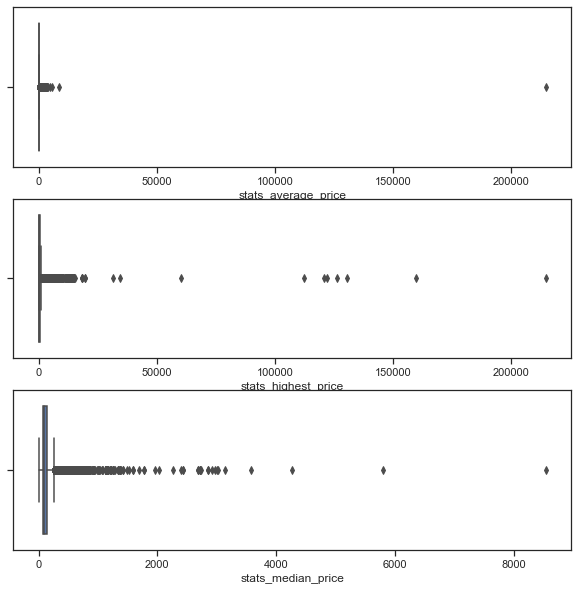

In [258]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
for measure, ax in zip(measures, axes.flat):
    sns.boxplot(concerts_filtered[measure], ax=ax);

In [259]:
# # Removing the Steely Dan concert
# concerts_filtered = concerts_filtered.drop(concerts_filtered['stats_average_price'].idxmax(), axis=0)
# concerts_filtered['stats_average_price'].max()

Maybe let's filter out those outliers with Z-score?

In [278]:
z_scores = np.abs(stats.zscore(concerts_filtered['stats_average_price']))
threshold = 2
print(np.where(z_scores >= threshold))
z_scores

(array([   48,    82,   102,   122,   172,   193,   251,   336,   505,
         619,   639,   644,   645,   686,   706,   733,   777,   805,
         824,   887,   913,   916,  1058,  1072,  1095,  1161,  1163,
        1166,  1289,  1290,  1335,  1393,  1455,  1483,  1551,  1563,
        1572,  1596,  1669,  1789,  1802,  1839,  1973,  2005,  2033,
        2056,  2315,  2522,  2563,  2705,  2794,  2820,  2881,  2884,
        2900,  2917,  2979,  3005,  3033,  3035,  3055,  3318,  3324,
        3335,  3501,  3749,  3762,  3793,  3841,  3849,  3883,  3892,
        3894,  3968,  4206,  4309,  4399,  4409,  4424,  4464,  4563,
        4587,  4594,  4632,  4685,  4716,  4749,  4751,  4780,  4800,
        4830,  4832,  4833,  4960,  5046,  5070,  5172,  5266,  5285,
        5297,  5362,  5367,  5526,  5682,  5758,  5849,  5887,  5892,
        5995,  6011,  6015,  6042,  6050,  6227,  6249,  6344,  6374,
        6389,  6413,  6417,  6482,  6483,  6516,  6526,  6616,  6775,
        6801,  7012

array([0.84264515, 0.5917163 , 0.62935563, ..., 0.76957269, 0.97438279,
       0.97438279])

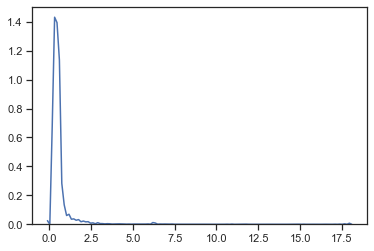

In [279]:
sns.kdeplot(z_scores);

In [280]:
z_scores.max()

17.98329152254406

In [281]:
# Filter by Z-Score: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
concerts_filtered = concerts_filtered[(z_scores < threshold)]
len(concerts_filtered)

22267

In [282]:
concerts_filtered['stats_average_price'].sort_values(ascending=False)

105772    475.0
35534     474.0
38396     474.0
7453      474.0
19800     473.0
8898      473.0
99622     472.0
79912     471.0
97825     471.0
98080     470.0
88251     470.0
88346     470.0
9582      470.0
96922     470.0
86785     470.0
8474      470.0
87057     470.0
16781     469.0
49180     469.0
32664     467.0
21509     467.0
21511     467.0
105584    466.0
28491     465.0
23242     465.0
94603     464.0
112135    464.0
79309     464.0
20125     464.0
21360     463.0
          ...  
18613      25.0
30477      25.0
73277      24.0
5811       24.0
352        24.0
703        24.0
15571      24.0
23295      24.0
123        23.0
3          22.0
13191      21.0
23959      21.0
30636      21.0
564        21.0
4381       21.0
28833      21.0
8362       21.0
9478       21.0
11402      21.0
25432      21.0
18073      21.0
19692      21.0
22422      21.0
47         20.0
61         19.0
86         19.0
4805       17.0
191        14.0
114366      1.0
114367      1.0
Name: stats_average_pric

In [283]:
concerts_filtered['stats_highest_price'].sort_values(ascending=False)

18650     31644.0
93563     18306.0
36847     15009.0
40412     14194.0
61918     13677.0
62342     13677.0
99695     13426.0
85904     13287.0
98497     13196.0
48315     13055.0
58193     12950.0
62619     12950.0
77151     12720.0
103036    12630.0
71024     12567.0
51883     12558.0
110486    12558.0
83825     12551.0
67358     12540.0
40281     12457.0
96712     12456.0
98523     12454.0
107258    12445.0
50304     12445.0
96872     12435.0
27132     12434.0
26434     12434.0
81420     12432.0
54564     12355.0
112161    12334.0
           ...   
26418        25.0
33956        25.0
24076        25.0
10450        25.0
47779        25.0
24737        25.0
9133         25.0
23295        24.0
703          24.0
5811         24.0
3            22.0
13191        21.0
25432        21.0
30636        21.0
564          21.0
4381         21.0
28833        21.0
8362         21.0
9478         21.0
11402        21.0
18073        21.0
19692        21.0
22422        21.0
23959        21.0
47        

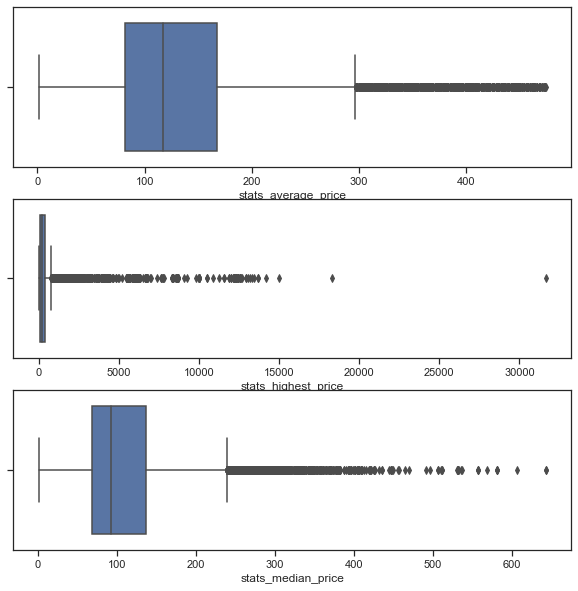

In [284]:
fig, axes = plt.subplots(3,1, figsize = (10,10))
for measure, ax in zip(measures, axes.flat):
    sns.boxplot(concerts_filtered[measure], ax=ax);

In [285]:
concerts_filtered['performers_name'].nunique()

4549

In [286]:
concerts_filtered[concerts_filtered['performers_name'] == 'Marie Osmond'].loc[:,'stats':'stats_median_price']

,stats_average_price,stats_dq_bucket_counts,stats_highest_price,stats_listing_count,stats_lowest_price,stats_lowest_price_good_deals,stats_lowest_sg_base_price,stats_lowest_sg_base_price_good_deals,stats_median_price
73,243.0,"[0, 0, 0, 0, 0, 0, 0, 0]",261.0,2.0,224.0,NaN,171.0,NaN,224.0
793,315.0,"[0, 0, 0, 0, 0, 0, 0, 0]",364.0,4.0,295.0,NaN,226.0,NaN,297.0
3196,352.0,"[0, 0, 0, 0, 0, 0, 0, 0]",989.0,17.0,198.0,NaN,151.0,NaN,280.0
5177,379.0,"[0, 0, 0, 0, 0, 0, 0, 0]",534.0,8.0,320.0,NaN,244.0,NaN,337.0
7373,443.0,"[0, 0, 0, 0, 0, 0, 0, 0]",466.0,4.0,421.0,NaN,329.0,NaN,436.0
8934,428.0,"[0, 0, 1, 0, 1, 0, 0, 0]",436.0,2.0,421.0,421.0,329.0,329.0,421.0


In [287]:
concerts_filtered[concerts_filtered['performers_name'] == 'Charli XCX'].loc[:,'stats':'stats_median_price']

,stats_average_price,stats_dq_bucket_counts,stats_highest_price,stats_listing_count,stats_lowest_price,stats_lowest_price_good_deals,stats_lowest_sg_base_price,stats_lowest_sg_base_price_good_deals,stats_median_price
739,44.0,"[0, 0, 0, 0, 0, 0, 0, 0]",89.0,14.0,23.0,NaN,16.0,NaN,33.0
2826,88.0,"[0, 0, 0, 0, 0, 0, 0, 0]",122.0,6.0,75.0,NaN,56.0,NaN,82.0
4426,183.0,"[0, 2, 0, 0, 0, 0, 1, 0]",274.0,4.0,106.0,172.0,79.0,129.0,172.0
6601,127.0,"[0, 0, 0, 0, 0, 0, 0, 0]",497.0,49.0,51.0,NaN,37.0,NaN,85.0
7103,137.0,"[0, 0, 0, 0, 0, 0, 0, 0]",332.0,12.0,65.0,NaN,47.0,NaN,89.0
8418,84.0,"[9, 25, 19, 14, 7, 10, 17, 0]",157.0,106.0,45.0,45.0,33.0,33.0,80.0
9558,186.0,"[0, 0, 0, 0, 0, 0, 0, 0]",274.0,5.0,156.0,NaN,117.0,NaN,166.0
13643,83.0,"[0, 0, 0, 0, 0, 0, 0, 0]",143.0,42.0,57.0,NaN,41.0,NaN,76.0
14143,130.0,"[0, 0, 0, 0, 0, 0, 0, 0]",336.0,26.0,81.0,NaN,60.0,NaN,121.0


In [274]:
concerts_filtered = concerts_filtered[useful_col]
concerts_filtered

,datetime_local,description,enddatetime_utc,general_admission,id,performers_genres,performers_id,performers_name,performers_num_upcoming_events,performers_popularity,...,venue_id,venue_location,venue_metro_code,venue_name,venue_num_upcoming_events,venue_popularity,venue_postal_code,venue_score,venue_slug,venue_state
3,2019-10-08T18:30:00,NaN,NaN,NaN,4864226,Pop,4313,Angels & Airwaves,15,0,...,544,"{'lat': 33.8058, 'lon': -117.911}",803,House of Blues - Anaheim,52,0,92802,0.544078,house-of-blues-anaheim,CA
4,2019-10-08T20:30:00,NaN,NaN,NaN,4973618,NaN,326247,The Aquadolls,3,0,...,50315,"{'lat': 29.9348, 'lon': -90.108}",622,Gasa Gasa,30,0,70115,0.354410,gasa-gasa,LA
5,2019-10-08T19:30:00,NaN,NaN,NaN,4927543,Pop,1605,Senses Fail,13,0,...,7435,"{'lat': 39.7768, 'lon': -105.044}",751,The Oriental Theater,19,0,80212,0.322193,the-oriental-theater,CO
7,2019-10-08T19:30:00,NaN,NaN,NaN,4710350,Pop,2711,Vampire Weekend,24,0,...,196,"{'lat': 39.6752, 'lon': -105.203}",751,Red Rocks Amphitheatre,25,0,80465,0.745735,red-rocks-amphitheatre,CO
11,2019-10-08T20:30:00,NaN,NaN,NaN,4916258,NaN,651595,LUTHI,5,0,...,3515,"{'lat': 43.0745, 'lon': -89.3809}",669,Majestic Theatre,30,0,53703,0.469178,majestic-theatre-1,WI
12,2019-10-08T19:30:00,NaN,NaN,NaN,4952475,NaN,695187,Dean Z: The Ultimate Elvis,1,0,...,1774,"{'lat': 53.6334, 'lon': -113.628}",0,Arden Theatre,27,0,T8N 3Z9,0.368129,arden-theatre,AB
18,2019-10-08T20:00:00,NaN,NaN,NaN,4952487,Soul,317501,Jidenna,28,0,...,452,"{'lat': 43.6131, 'lon': -116.207}",757,Knitting Factory Boise,40,0,83702,0.424066,knitting-factory-boise,ID
20,2019-10-08T19:00:00,NaN,NaN,True,4902883,Pop,23371,Bleached,9,0,...,1020,"{'lat': 49.2603, 'lon': -123.097}",0,Biltmore Cabaret,18,0,V5T 0B5,0.401773,biltmore-cabaret,BC
27,2019-10-08T20:00:00,NaN,NaN,NaN,4887257,Pop,1258,Mike Doughty,23,0,...,464085,"{'lat': 41.1042, 'lon': -112.017}",770,The State Room,18,0,84111,0.000000,the-state-room-5,UT
29,2019-10-08T20:00:00,NaN,NaN,NaN,4912486,NaN,426880,Cigarettes After Sex,20,0,...,78198,"{'lat': 35.0839, 'lon': -106.649}",790,Sunshine Theatre,12,0,87102,0.000000,sunshine-theatre-1,NM


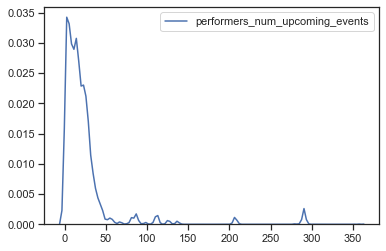

In [288]:
sns.kdeplot(concerts_filtered['performers_num_upcoming_events']);

In [289]:
concerts_filtered['performers_name'].value_counts()

Opium                                   289
Purple Reign - Prince Tribute           139
Trans-Siberian Orchestra                115
Tenors of Rock                           98
Carolina Opry                            89
Deck The Hall Ball                       86
David Byrne's American Utopia            83
The Australian Bee Gees                  72
Legends In Concert                       62
Dionne Warwick                           59
Straight No Chaser                       55
Celine Dion                              46
Home Free                                46
NF - Nate Feuerstein                     45
Dermot Kennedy                           44
Celtic Woman                             42
The Lumineers                            41
B (Beatles Tribute)                      40
Johnnyswim                               40
Dan + Shay                               40
Luke Combs                               38
TobyMac                                  38
Purple Reign                    